
<link rel="stylesheet" href="https://unpkg.com/thebe@latest/lib/index.css">
<script src="https://unpkg.com/thebe@latest/lib/index.js"></script>

<script type="text/javascript">
  document.addEventListener("DOMContentLoaded", function() {
    thebelab.bootstrap({
      requestKernel: true,
      binderOptions: {
        repo: "your-repo/your-project",
        ref: "main",
      },
      codeMirrorConfig: {
        theme: "abcdef",
      },
    });
  });
</script>


# **Data Readiness For AI Checklist - Part 5**

 * Affiliation: UK Met Office
 * History: 1.0
 * Last update: 25-2-25
 * © British Crown Copyright 2017-2025, Met Office. Please see LICENSE.md for license details.


---

## **Tutorial Material**

* **Run this Jupyter notebook locally using Jupyter Lab**
* **Select 'Run All Cells' from the 'Run' menu to generate the checklist**.
* **Remember to save your notebook regularly as you work through it to prevent loosing your answers.**


## **Data section**

We used NOAA's search facility (https://www.ncei.noaa.gov/access/search/data-search/global-summary-of-the-day) to download the Global Surface Summary of the Day data between 1979 and 2024 from the weather station in Exeter, UK. 

---

## **Setup Notebook**

In [81]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import json
import sys
import os
sys.path.append(os.path.abspath('../..')) # Add the parent directory to the system path
from utils import *

In [82]:
# Load checklist from JSON file:
checklist = load_checklist()

#### Reset stored answers to start again:

In [83]:
# Reset all checklist answers back to original blank answers for all sections.
# Any completed information will be lost. 

# To reset the stored answers uncomment and run these lines of code below. Re-comment the lines afterwards to avoid them running again. 
# reset_checklist()
# checklist = load_checklist()

# You can then re-run each section to reload it on the reset data. 

In [84]:

print("Dataset:", checklist["GeneralInformation"]["DatasetName"])
print("Dataset link:", checklist["GeneralInformation"]["DatasetLink"])
print("Assessor:", checklist["GeneralInformation"]["AssessorName"])
print("Assessor email:", checklist["GeneralInformation"]["AssessorEmailAddress"])

Dataset: NOAA Global Surface Summary of the Day (GSOD)
Dataset link: https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00516/html
Assessor: John Pill
Assessor email: john.pill@metoffice.gov.uk


## **Load Data**

In [85]:
import pandas as pd
import numpy as np

In [86]:
file_path = "Data/NOAA_GSOD_Exeter_1979_2024.csv"
df = pd.read_csv(file_path)
df

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,3839099999,1979-01-04,24.1,0,999.9,37.4,30.2,29.9,0.00,1002.9,1.6,999.9,33.9,14.0,23.4
1,3839099999,1979-01-05,20.7,0,999.9,30.2,21.2,31.1,0.00,1021.1,1.2,999.9,27.4,11.3,14.9
2,3839099999,1979-01-06,20.7,0,999.9,32.0,15.8,1.9,0.00,1028.7,1.2,999.9,24.3,5.0,1.1
3,3839099999,1979-01-07,43.0,10000,999.9,48.2,28.4,9.9,0.01,1025.7,0.8,999.9,44.5,9.6,6.7
4,3839099999,1979-01-08,43.9,110000,999.9,48.2,42.8,5.1,0.04,1019.6,999.9,999.9,45.7,9.4,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16352,3839099999,2023-12-31,41.6,10000,32.1,51.8,44.6,20.0,99.99,9999.9,999.9,999.9,47.6,6.2,14.9
16353,3839099999,2024-01-01,45.2,10000,999.9,51.8,41.0,17.1,99.99,9999.9,999.9,999.9,48.1,5.6,10.4
16354,3839099999,2024-01-02,48.4,10000,46.0,57.2,48.2,29.9,99.99,9999.9,999.9,999.9,52.1,5.7,15.8
16355,3839099999,2024-01-03,44.9,10000,22.9,51.8,46.4,14.0,99.99,9999.9,999.9,999.9,49.1,6.1,9.6


---

## **5. Data Preparation**

### Null values

In [87]:
def print_null_percent(df):
    """
    Prints the count and percentage of null values in each column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame for which to calculate and print 
                           the count and percentage of missing values.
    """
    missing_count = df.isna().sum()
    missing_percentage = missing_count / len(df) * 100
    formatted_percentage = missing_percentage.apply(lambda x: f"{x:.1f}%")

   # Create a new DataFrame with both counts and formatted percentages
    result_df = pd.DataFrame({
        'Count': missing_count,
        'Percent': formatted_percentage
    })
    
    print("PERCENTAGE OF NULL VALUES\n")
    print(result_df)

In [88]:
print_null_percent(df)

PERCENTAGE OF NULL VALUES

         Count Percent
STATION      0    0.0%
DATE         0    0.0%
DEWP         0    0.0%
FRSHTT       0    0.0%
GUST         0    0.0%
MAX          0    0.0%
MIN          0    0.0%
MXSPD        0    0.0%
PRCP         0    0.0%
SLP          0    0.0%
SNDP         0    0.0%
STP          0    0.0%
TEMP         0    0.0%
VISIB        0    0.0%
WDSP         0    0.0%


In [89]:
def mask_values(df, values_to_mask, new_value):
    """
    Masks specified values in a DataFrame and replaces them with a specified value.

    Parameters:
    df (pandas.DataFrame): The DataFrame in which to mask the specified values.
    values_to_mask: An array of values to replace.
    new_value: The new value you wish to replace the values with in values_to_mask.

    Returns:
    pandas.DataFrame: A new DataFrame with the specified values replaced with a new value.
    """
    df_masked = df.mask(df.isin(values_to_mask), new_value)
    return df_masked

In [90]:
# Whilst there are no null values in the dataset,by reading the dataset documentation it is clear that there are lots of missing values. 
# These are imputed with all 9 numbers. Lets replace these values with NaN representing missing values and re-assess the dataset. 

# Define the values to replace - these are specified in the dataset documentation. 
values_to_mask = [9999.9, 999.9, 99.99]

# Call the mask_values function and pass the dataframe, an array of values to mask and a new value of Nan.
df_masked = mask_values(df, values_to_mask, np.nan)

# Use the print_null_percent function to re-assess the dataset for null values. 
print_null_percent(df_masked)

PERCENTAGE OF NULL VALUES

         Count Percent
STATION      0    0.0%
DATE         0    0.0%
DEWP        58    0.4%
FRSHTT       0    0.0%
GUST     13332   81.5%
MAX         11    0.1%
MIN         12    0.1%
MXSPD       72    0.4%
PRCP      4635   28.3%
SLP      11834   72.3%
SNDP     16282   99.5%
STP      16357  100.0%
TEMP         0    0.0%
VISIB       51    0.3%
WDSP         6    0.0%


In [91]:

dataset_null_values = widgets.Combobox(
            value=checklist['DataPreparation']['NullValuesFilled'],
            options=['Yes', 'No', 'N/A'],
            description='5.1 Have null values/gaps been filled?',
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

display(dataset_null_values)

Combobox(value='No', description='5.1 Have null values/gaps been filled?', layout=Layout(width='900px'), optio…

### Outliers

In [92]:
# Lets work with our new df_masked dataframe as the high 999 values where not necessarily outliers, but imputed values. 


# DESCRIBE

# First we could check key statistics relating to our dataset and review the min and max values to assess whether they might include outliers, particularly when considering the mean. 

df_masked.describe()


,STATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1.635700e+04,16299.000000,16357.000000,3025.000000,16346.000000,16345.000000,16285.000000,11722.000000,4523.000000,75.000000,0.0,16357.000000,16306.000000,16351.000000
mean,3.839100e+09,45.964967,18437.174971,30.972926,58.353108,44.147085,14.045484,0.050111,1015.902808,3.696000,NaN,51.803093,7.555225,7.852859
std,0.000000e+00,8.408016,33052.927721,7.661645,9.912612,9.087545,5.365024,0.148872,10.704444,14.124652,NaN,8.925665,4.358479,3.816827
min,3.839100e+09,8.600000,0.000000,11.100000,23.400000,2.300000,1.000000,0.000000,960.600000,0.400000,NaN,13.600000,0.100000,0.000000
25%,3.839100e+09,40.200000,0.000000,26.000000,51.800000,37.400000,9.900000,0.000000,1009.500000,0.400000,NaN,45.600000,5.800000,5.000000
50%,3.839100e+09,46.600000,10000.000000,29.900000,57.200000,44.600000,13.000000,0.000000,1017.100000,1.200000,NaN,52.000000,6.300000,7.300000
75%,3.839100e+09,52.400000,10000.000000,35.000000,66.200000,51.600000,17.100000,0.010000,1023.300000,2.000000,NaN,58.800000,7.000000,10.100000
max,3.839100e+09,65.800000,111010.000000,74.000000,91.400000,73.400000,56.900000,3.230000,1045.400000,116.500000,NaN,77.100000,37.700000,29.800000


In [93]:
# VISUALISE

# Next, we could visualise the values for each column to try and assess if there are values which lie outside the expected range. 

In [94]:
def plot_violin_graphs(dataframe, column_feature_names):
    """
    Creates violin plots for columns. Useful tolook for outlier values.
    Arguments - a Pandas DataFrame and a list of DataFrame column names
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(column_feature_names), figsize=(18,5))

    for i, column in enumerate(dataframe[column_feature_names]):
        sns.violinplot(y=dataframe[column], ax=axes[i])
        # axes[i].set_title(column)

    plt.tight_layout()    
    plt.show() 


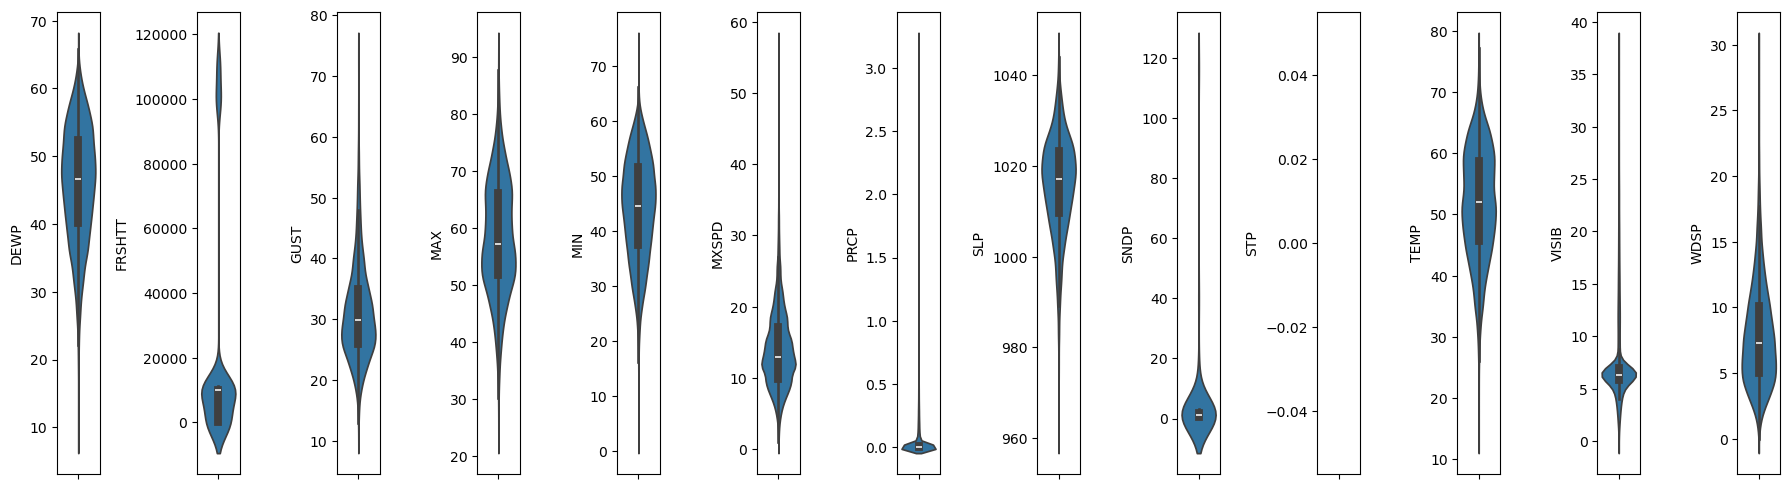

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of feature column names by dropping columns with unhelpful data such as station ID, and date. 
column_feature_names = df.drop(['STATION', 'DATE'], axis=1).columns

# Call the plot_violin_graphs function passing the dataframe and columns to plot. 
plot_violin_graphs(df_masked, column_feature_names)

In [96]:
# Z-SCORE 

# Calculating the z-score can also help to identify outliers. 
# The z score is an indication of how many standard deviations from the mean data point. 
# A z score of more than 2 could be an outlier. A z score of more than 3 is more likely to be an outlier. 

In [97]:
def print_z_scores(df):
    """
    Calculate and print the number of z-scores in a DataFrame that exceed specified thresholds.

    This function computes the z-scores for each column in the provided DataFrame,
    counts how many of these z-scores are greater than 2 and 3 in absolute value,
    and prints the results.

    Parameters:
    df (pd.DataFrame): A pandas DataFrame containing numerical data for which z-scores 
                       will be calculated.
    """
    z_scores = df.apply(zscore)
    abs_z_scores = abs(z_scores)
    high_z_scores_2 = (abs_z_scores > 2).sum().sum()
    high_z_scores_3 = (abs_z_scores > 3).sum().sum()
    
    print('Number of values with a z-score greater than 2:', high_z_scores_2)
    print('Number of values with a z-score greater than 3:', high_z_scores_3)
    print('Total z_scores:', len(z_scores))

In [98]:
from scipy.stats import zscore

# Call the print_z_scores function and pass the masked dataframe with the column_feature_names selected. 
print_z_scores(df_masked[column_feature_names])

Number of values with a z-score greater than 2: 2626
Number of values with a z-score greater than 3: 15
Total z_scores: 16357


In [99]:

dataset_outliers = widgets.Combobox(
            value=checklist['DataPreparation']['OutliersIdentified'],
            options=['Yes, tagged ', 'Yes, removed', 'No', 'N/A'],
            description='5.2 Have outliers been identified?',
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

display(dataset_outliers)


Combobox(value='No', description='5.2 Have outliers been identified?', layout=Layout(width='900px'), options=(…

### Gridded data


In [100]:

dataset_gridded = widgets.Combobox(
            value=checklist['DataPreparation']['Gridded'],
            options=['Regularly gridded in space', 'Constant time-frequency', 'Regularly gridded in space and constant time-frequency', 'Not gridded', 'N/A'],
            description='5.3 Is the data gridded (regularly sampled in time and space)?',
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

dataset_gridded_transformed = widgets.Combobox(
            value=checklist['DataPreparation']['TransformedFromOriginal'],
            options=['Yes, from irregular sampling', 'Yes, from a different regular sampling', 'No, this is the original sampling', 'N/A'],
            description='If the data is gridded, was it transformed from a different original sampling?',            
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )


dataset_gridded_original_sample = widgets.Combobox(
            value=checklist['DataPreparation']['OriginalSamplingAvailable'],
            options=['Yes', 'No', 'Only by request', 'N/A'],
            description = 'If the data is resampled from the original sampling, is the data also available at the original sampling?',
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

display(dataset_gridded, dataset_gridded_transformed, dataset_gridded_original_sample)

Combobox(value='Not gridded', description='5.3 Is the data gridded (regularly sampled in time and space)?', la…

Combobox(value='', description='If the data is gridded, was it transformed from a different original sampling?…

Combobox(value='', description='If the data is resampled from the original sampling, is the data also availabl…

### Targets / labels for supervised learning

In [101]:

dataset_targets_or_labels = widgets.Combobox(
            value=checklist['DataPreparation']['SupervisedLearningLabels'],
            options=['Yes', 'No', 'N/A'],
            description = '5.4 Are there associated targets or labels for supervised learning techniques?',
            placeholder='Click to select option - (Can this be used as a training dataset)?',
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

dataset_targets_or_labels_standards_label = widgets.Label(
    value = "If there are associated targets/labels, are community labeling standards implemented?"
)

dataset_targets_or_labels_standards = widgets.Text(
            value=checklist['DataPreparation']['SupervisedLearningLabelStandards'],
            placeholder = 'e.g., STAC label extension, ESA AIREO specification, etc.',
            layout = widgets.Layout(width=widget_width)
)

display(dataset_targets_or_labels, dataset_targets_or_labels_standards_label, dataset_targets_or_labels_standards)

Combobox(value='No', description='5.4 Are there associated targets or labels for supervised learning technique…

Label(value='If there are associated targets/labels, are community labeling standards implemented?')

Text(value='', layout=Layout(width='900px'), placeholder='e.g., STAC label extension, ESA AIREO specification,…

In [102]:

# Save button
save_button = widgets.Button(description="Save Data Access Answers to json file",  button_style="primary",  layout=widgets.Layout(flex='1 1 auto', width='auto'))

def generate_updates_preparation():

    updates = {
        "DataPreparation": {
            "NullValuesFilled": dataset_null_values.value,
            "OutliersIdentified": dataset_outliers.value,
            "Gridded": dataset_gridded.value,
            "TransformedFromOriginal": dataset_gridded_transformed.value,
            "OriginalSamplingAvailable": dataset_gridded_original_sample.value, 
            "SupervisedLearningLabels" : dataset_targets_or_labels.value,
            "SupervisedLearningLabelStandards" : dataset_targets_or_labels_standards.value,
          
        }
    }
    return updates

save_button.on_click(lambda b: update_checklist(b, generate_updates_preparation()))

display(save_button)

Button(button_style='primary', description='Save Data Access Answers to json file', layout=Layout(flex='1 1 au…

## Finished

In [103]:

button_print_json = widgets.Button(description="Print json results",  button_style='info', layout=widgets.Layout(flex='1 1 auto', width='auto'))
output = widgets.Output()

display(button_print_json, output)

def print_json_info(b):
    """
    Loads a copy of the json file to checklist variable. 
    Then prints the json file contents to Jupyter notebook cell output.

    Arguments: b - represents the button calling the function. 
    """
    checklist = load_checklist()
    with output:
        clear_output()
        for key, value in checklist.items():
            print(f"{key}:")
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    print(f"  {sub_key}: {sub_value}")
            else:
                print(f"  {value}")

button_print_json.on_click(print_json_info)


Button(button_style='info', description='Print json results', layout=Layout(flex='1 1 auto', width='auto'), st…

Output()

---

## **Appendix** - Definition of terms used in the checklist.